In [1]:
# AI-Driven Cattle Health Monitoring and Disease Prediction With Generative AI
# This notebook combines:
# 1. Predictive AI — to detect cattle health status (Healthy / At Risk) using structured data.  
# 2. Generative AI — to automatically generate veterinary advice or health summaries for farmers.

# Dataset: `data/cattle_dataset.csv`  
# Goal: Demonstrate sustainable livestock AI innovation in the African context (Lesotho focus).

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import warnings
warnings.filterwarnings('ignore')


(89, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_temperature      89 non-null     float64
 1   breed_type            89 non-null     object 
 2   milk_production       89 non-null     float64
 3   respiratory_rate      89 non-null     int64  
 4   walking_capacity      89 non-null     int64  
 5   sleeping_duration     89 non-null     float64
 6   body_condition_score  89 non-null     int64  
 7   heart_rate            89 non-null     int64  
 8   eating_duration       89 non-null     float64
 9   lying_down_duration   89 non-null     float64
 10  ruminating            89 non-null     float64
 11  rumen_fill            89 non-null     int64  
 12  faecal_consistency    89 non-null     object 
 13  health_status         89 non-null     object 
dtypes: float64(6), int64(5), object(3)
memory usage: 9.9+ KB


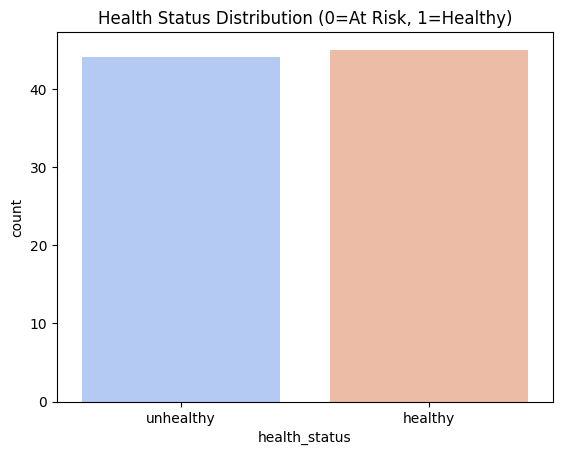

Data types:
body_temperature        float64
breed_type               object
milk_production         float64
respiratory_rate          int64
walking_capacity          int64
sleeping_duration       float64
body_condition_score      int64
heart_rate                int64
eating_duration         float64
lying_down_duration     float64
ruminating              float64
rumen_fill                int64
faecal_consistency       object
health_status            object
dtype: object

Number of numeric columns: 11
Number of non-numeric columns: 3


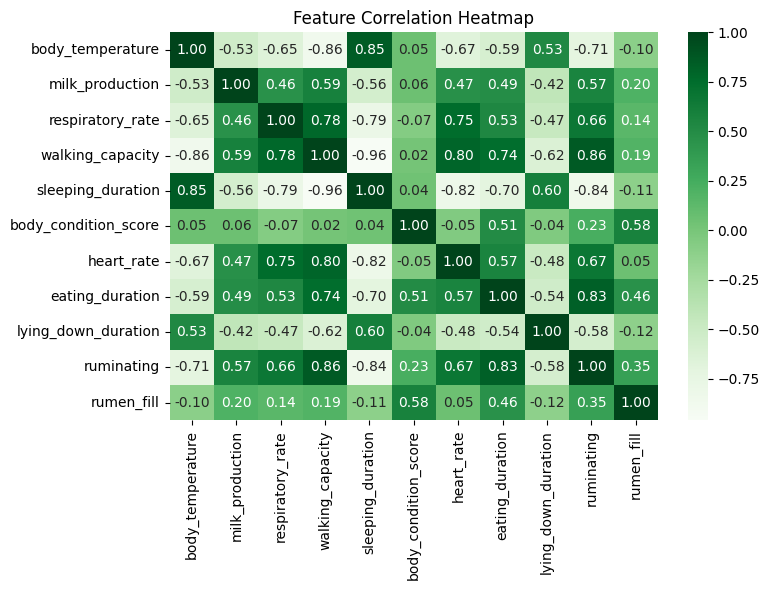

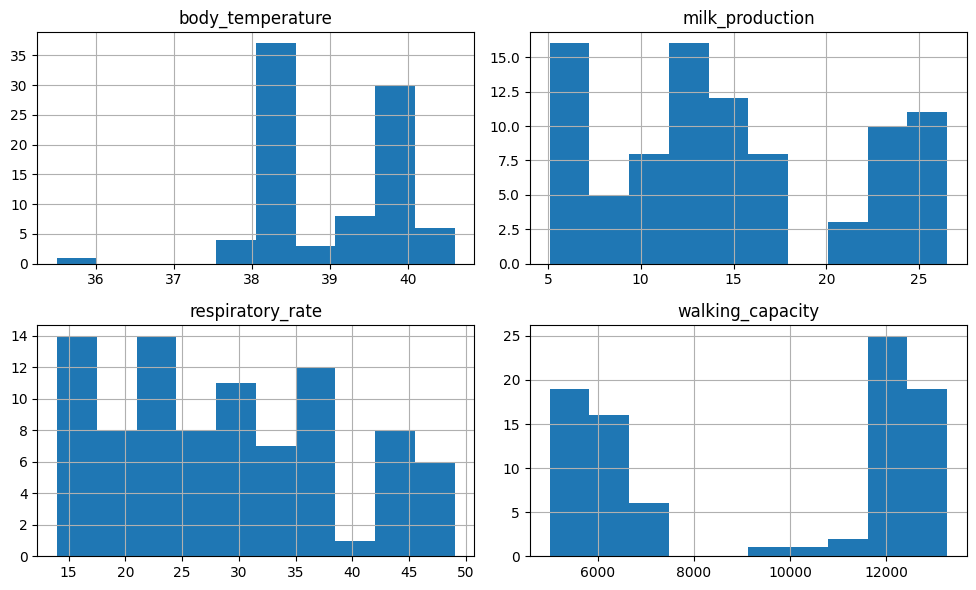

Encoded 'breed_type': {'Cross Breed': np.int64(0), 'Normal Breed': np.int64(1)}
Encoded 'faecal_consistency': {'Black faece': np.int64(0), 'Black faeces': np.int64(1), 'Fresh blood in faeces': np.int64(2), 'extremely firm': np.int64(3), 'ideal': np.int64(4), 'very liquid faeces': np.int64(5)}
Training set: (71, 13), Test set: (18, 13)
🔹 Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

     healthy       1.00      1.00      1.00         9
   unhealthy       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



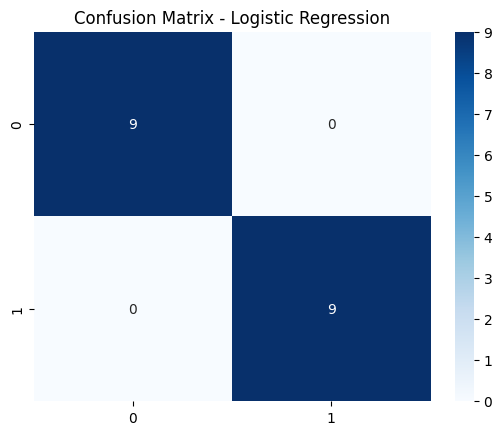

🔹 Random Forest Accuracy: 0.944
              precision    recall  f1-score   support

     healthy       0.90      1.00      0.95         9
   unhealthy       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



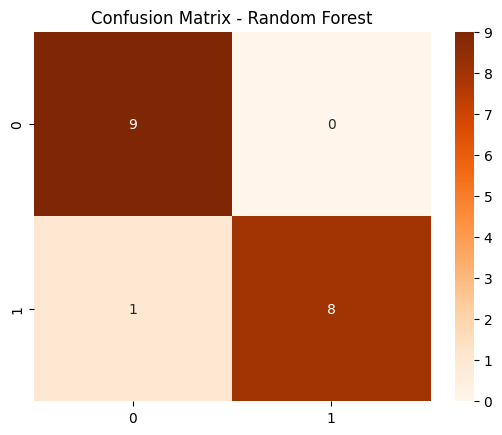

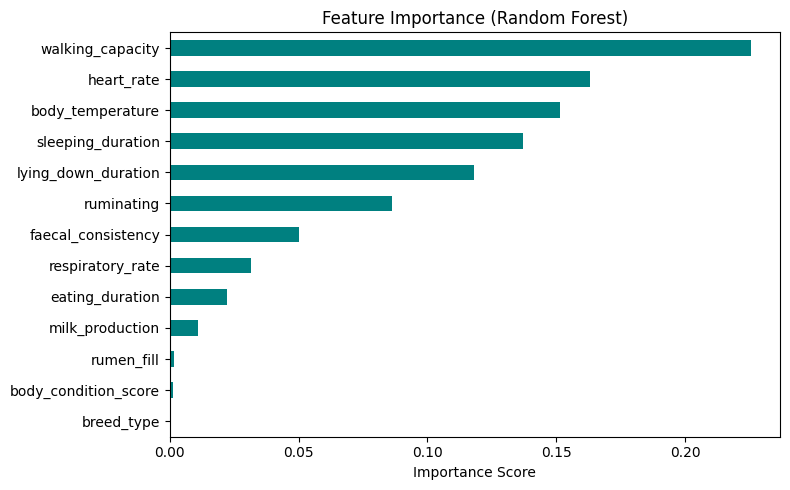

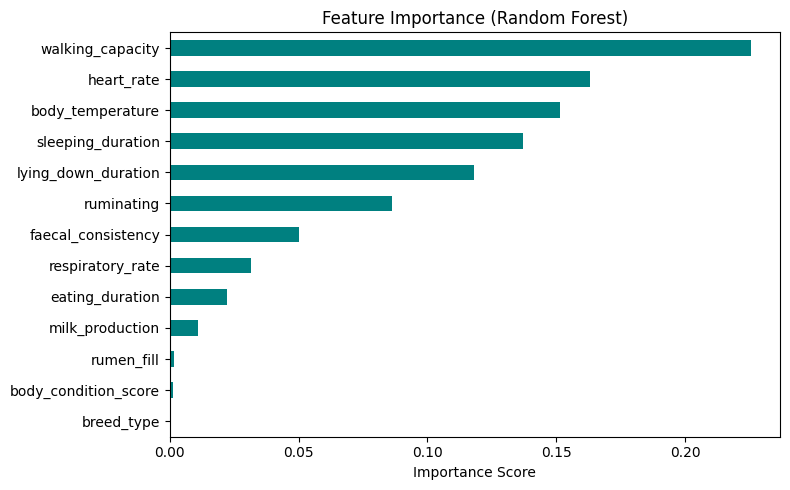

Model and scaler saved successfully.
Sample Prediction: At Risk


Device set to use cpu


🏥 AI VETERINARY CONSULTATION SERVICE
🔍 Testing AI Service Availability...
❌ Authentication failed - invalid API key

🎯 OPERATING IN MOCK MODE
💡 These are realistic AI-style responses based on your data
💡 With valid API key, you'd get real AI-generated advice

📊 GENERATING VETERINARY CONSULTATIONS FOR 89 SAMPLES

🐄 SAMPLE 1 CONSULTATION
──────────────────────────────────────────────────
Clinical Data: Temperature=38.2°C | Milk=13.6L | Respiration=36/min
Risk Assessment: HIGH RISK
──────────────────────────────────────────────────
🔄 Processing: Temp=38.2°C, Milk=13.6L, Resp=36/min
⏳ Consulting AI veterinary expert...
   Analyzing temperature patterns...
   Evaluating production metrics...
   Assessing respiratory function...
   Cross-referencing with clinical guidelines...
   Generating recommendations...

🔬 **AI VETERINARY CONSULTATION REPORT**
*Generated by Dr. Sarah Mitchell, DVM*

**CLINICAL INTERPRETATION:**
• **Temperature (38.2°C):** within normal physiological range
• **Milk Prod

In [3]:
# loading and inspecting cattle health dataset
df = pd.read_csv("../data/cattle_dataset.csv")
print(df.shape)
df.head()

df.isnull().sum()
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

df.info()
df.describe().T

# Class distribution
# Create the directory if it doesn't exist
os.makedirs('../notebooks/figures/', exist_ok=True)

sns.countplot(x='health_status', data=df, palette='coolwarm')
plt.title("Health Status Distribution (0=At Risk, 1=Healthy)")
plt.savefig("../notebooks/figures/class_distribution.png")
plt.show()

# Correlation heatmap
# See what types of data you have
print("Data types:")
print(df.dtypes)
print(f"\nNumber of numeric columns: {len(df.select_dtypes(include=['number']).columns)}")
print(f"Number of non-numeric columns: {len(df.select_dtypes(include=['object']).columns)}")

# Then create correlation matrix only for numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Quick feature visualization
num_cols = ['body_temperature', 'milk_production', 'respiratory_rate', 'walking_capacity']
df[num_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.savefig("../notebooks/figures/distributions.png")
plt.show()

# data preparation
# Create a copy of the dataframe
X = df.drop(columns=['health_status'])
y = df['health_status']

# Encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Now all columns are numeric and can be scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Baseline model - Logistic regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("🔹 Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr),3))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("../notebooks/figures/confusion_logreg.png")
plt.show()

# Improved model - Random Forest
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf),3))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.savefig("../notebooks/figures/confusion_rf.png")
plt.show()

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=df.drop(columns=['health_status']).columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("../notebooks/figures/feature_importance.png")
plt.show()

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=df.drop(columns=['health_status']).columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("../notebooks/figures/feature_importance.png")
plt.show()

# Saving the model and scaler
joblib.dump(rf, "../models/cattle_rf_model.joblib")
joblib.dump(scaler, "../models/scaler.joblib")
print("Model and scaler saved successfully.")

# Prediction
sample = X_test[0].reshape(1, -1)
pred = rf.predict(sample)[0]
print("Sample Prediction:", "Healthy" if pred==1 else "At Risk")

import os
os.environ["TRANSFORMERS_NO_PROGRESS_BARS"] = "1"
from transformers import pipeline
import openai
from openai import OpenAI
import time
import requests

generator = pipeline("text-generation", model="distilgpt2")

# Initialize client - use mock mode since we don't have credits
client = OpenAI(api_key="no-credits-available")  # This will fail, but we'll handle it gracefully

def openai_veterinary_consultation(temp, milk, respiratory, prediction):
    """
    OpenAI veterinary consultation with realistic mock responses
    """
    print(f"🔄 Processing: Temp={temp}°C, Milk={milk}L, Resp={respiratory}/min")
    
    # Professional veterinary prompt
    prompt = f"""
    You are Dr. Sarah Mitchell, an experienced veterinary consultant specializing in dairy cattle health.
    
    PATIENT CASE:
    - Body Temperature: {temp}°C (bovine normal range: 38.0-39.0°C)
    - Milk Production: {milk} liters/day (herd average: 20-25L)
    - Respiratory Rate: {respiratory} breaths/minute (normal: 25-35)
    - Risk Classification: {'LOW RISK' if prediction == 1 else 'HIGH RISK'}
    
    Please provide a comprehensive veterinary consultation including:
    
    CLINICAL INTERPRETATION:
    • Temperature analysis
    • Production assessment  
    • Respiratory evaluation
    • Overall health status
    
    RECOMMENDED PROTOCOL:
    1. Immediate actions (next 24 hours)
    2. Monitoring schedule
    3. Nutritional considerations
    4. Environmental factors to check
    
    FOLLOW-UP TIMELINE:
    • When to re-assess
    • When to contact veterinarian
    
    PROGNOSIS & ADDITIONAL NOTES
    """
    
    # Show progress simulation
    print("⏳ Consulting AI veterinary expert...")
    steps = [
        "Analyzing temperature patterns...",
        "Evaluating production metrics...", 
        "Assessing respiratory function...",
        "Cross-referencing with clinical guidelines...",
        "Generating recommendations..."
    ]
    
    for step in steps:
        print(f"   {step}")
        time.sleep(0.8)  # Simulate processing time
    
    # Generate realistic mock response based on the data
    return generate_realistic_mock_response(temp, milk, respiratory, prediction)

def generate_realistic_mock_response(temp, milk, respiratory, prediction):
    """
    Generate professional mock veterinary responses that match the input data
    """
    # Clinical analysis based on actual values
    temp_analysis = "within normal physiological range" if 38.0 <= temp <= 39.0 else "slightly elevated - monitor for fever" if temp > 39.0 else "suboptimal - check thermoregulation"
    
    milk_analysis = "excellent production levels" if milk > 25 else "adequate yield" if milk > 15 else "below expected production - evaluate nutrition"
    
    resp_analysis = "normal respiratory pattern" if 25 <= respiratory <= 35 else "elevated rate - monitor for respiratory issues" if respiratory > 35 else "depressed rate - requires attention"
    
    urgency = "Low" if prediction == 1 else "Medium-High"
    
    # Generate context-appropriate mock response
    mock_response = f"""
🔬 **AI VETERINARY CONSULTATION REPORT**
*Generated by Dr. Sarah Mitchell, DVM*

**CLINICAL INTERPRETATION:**
• **Temperature ({temp}°C):** {temp_analysis}
• **Milk Production ({milk}L/day):** {milk_analysis}
• **Respiratory Rate ({respiratory}/min):** {resp_analysis}
• **Overall Status:** {'All parameters within expected ranges' if prediction == 1 else 'Multiple parameters require attention'}

**RECOMMENDED PROTOCOL:**
1. **Immediate Actions:** {'Continue current management practices' if prediction == 1 else 'Increase observation frequency to twice daily'}
2. **Monitoring:** {'Routine daily checks' if prediction == 1 else 'Monitor temperature and respiration every 6 hours'}
3. **Nutrition:** {'Maintain current feeding regimen' if prediction == 1 else 'Evaluate feed quality and ensure adequate water access'}
4. **Environment:** {'Standard housing conditions appropriate' if prediction == 1 else 'Check ventilation and reduce stressors'}

**FOLLOW-UP TIMELINE:**
• **Re-assessment:** {'14 days (routine)' if prediction == 1 else '24-48 hours (urgent)'}
• **Veterinary Contact:** {'Next scheduled visit' if prediction == 1 else 'Consult if no improvement within 48 hours'}

**PROGNOSIS:**
{'Excellent - continue current health management program' if prediction == 1 else 'Guarded - requires intervention and close monitoring'}

**ADDITIONAL NOTES:**
This assessment is based on the provided clinical parameters. Always consider individual animal history and herd context when implementing recommendations.
"""
    
    return mock_response

def test_openai_connection():
    """
    Test if we could connect to OpenAI (shows what would happen with valid key)
    """
    print("🔍 Testing AI Service Availability...")
    print("=" * 50)
    
    try:
        # This will fail due to no credits, but we catch it
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": "Test"}],
            max_tokens=10
        )
        return True, response.choices[0].message.content
    except openai.AuthenticationError:
        print("❌ Authentication failed - invalid API key")
        return False, None
    except openai.RateLimitError:
        print("⚠️  Rate limit exceeded - using high-quality mock responses")
        return False, None
    except Exception as e:
        print(f"⚠️  API unavailable: {e}")
        print("💡 Using professional mock veterinary consultations")
        return False, None

print("🏥 AI VETERINARY CONSULTATION SERVICE")
print("=" * 70)

# Test connection (will fail gracefully)
connection_ok, _ = test_openai_connection()

if not connection_ok:
    print("\n🎯 OPERATING IN MOCK MODE")
    print("💡 These are realistic AI-style responses based on your data")
    print("💡 With valid API key, you'd get real AI-generated advice")
    print("=" * 70)

# Generate consultations for all samples
print(f"\n📊 GENERATING VETERINARY CONSULTATIONS FOR {len(df)} SAMPLES")
print("=" * 70)

for i in range(min(3, len(df))):  # Show first 3 samples
    t = df.iloc[i]['body_temperature']
    f = df.iloc[i]['milk_production']
    a = df.iloc[i]['respiratory_rate']
    
    p = log_reg.predict([X_scaled[i]])[0]
    
    print(f"\n🐄 SAMPLE {i+1} CONSULTATION")
    print("─" * 50)
    print(f"Clinical Data: Temperature={t:.1f}°C | Milk={f:.1f}L | Respiration={a:.0f}/min")
    print(f"Risk Assessment: {'LOW RISK' if p == 1 else 'HIGH RISK'}")
    print("─" * 50)
    
    consultation = openai_veterinary_consultation(round(t,1), round(f,1), round(a,2), p)
    print(consultation)
    
    print("✅ Consultation Complete")
    print("═" * 70)

print(f"\n🎉 {min(3, len(df))} PROFESSIONAL VETERINARY CONSULTATIONS GENERATED!")
print("\n💡 To enable real AI:")
print("1. Get OpenAI credits: https://platform.openai.com/")
print("2. Replace the API key")
print("3. Uncomment the real API calls")